## Case Study 1940s

In [1]:
#%%IMPORTING
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import datetime
import matplotlib.colors as colors
divnorm = colors.TwoSlopeNorm(vcenter=0)
plt.rcParams.update({'font.size': 18})
from functions.loading_and_processing_data import loadMITgcmData,loadTimeSeriesData, detrend_and_average_MITgcmData, read_all_data
from functions.composite_maps import createCompositeMap, createVelocityCompositeMap, defineEvents, findEvents

In [2]:
%%capture
forcing=loadTimeSeriesData(filename='timeseries_forcing', members='all', kind='old')
forcing['time']=forcing.indexes['time'].to_datetimeindex()
vwind=loadTimeSeriesData(filename='timeseries_vwind', members='all', kind='timeseries')
vwind['time']=vwind.indexes['time'].to_datetimeindex()
full=loadTimeSeriesData(filename='timeseries_final', members='all', kind='old')
full['time']=full.indexes['time'].to_datetimeindex()
# salt=loadTimeSeriesData(filename='timeseries_salt', members='all', kind='timeseries')
# salt['time']=salt.indexes['time'].to_datetimeindex()
salt=loadTimeSeriesData(filename='timeseries_salt_0to200', members='all', kind='timeseries')
salt['time']=salt.indexes['time'].to_datetimeindex()
salt2=loadTimeSeriesData(filename='timeseries_salt', members='all', kind='timeseries')
salt2['time']=salt2.indexes['time'].to_datetimeindex()

salt=salt.sortby('time')
salt2=salt2.sortby('time')
vwind=vwind.sortby('time')

In [3]:
PITE=xr.open_dataarray('../02_data/indices/ADVy_TH_PITE.nc')
PITE['time']=PITE.indexes['time'].to_datetimeindex()

U115=xr.open_dataarray('../02_data/indices/undercurrent_W115.nc')
U115['time']=U115.indexes['time'].to_datetimeindex()

/tmp/ipykernel_47052/2416957017.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  PITE['time']=PITE.indexes['time'].to_datetimeindex()
/tmp/ipykernel_47052/2416957017.py:5: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  U115['time']=U115.indexes['time'].to_datetimeindex()


In [5]:
cumul_vwind=detrend_and_average_MITgcmData(vwind, var='inner_amundsen_shelf_vwind_avg', window=1)
cumul_uwind=detrend_and_average_MITgcmData(full, var='amundsen_shelf_break_uwind_avg', window=1)
cumul_vwind=cumul_vwind.cumsum(dim='time')
cumul_uwind=cumul_uwind.cumsum(dim='time')

seaice=forcing['amundsen_shelf_seaice_freeze']+forcing['amundsen_shelf_seaice_melt']
cumul_seaice=detrend_and_average_MITgcmData(seaice.to_dataset(name='seaice'), var='seaice', window=1)
cumul_seaice=cumul_seaice.cumsum(dim='time')

In [6]:
def plot_timeseries(data, ax, window=60, handpicked=None, years=[1920,2013], show40s=True,
                   colors=['grey','black','blue','red'], show=[True,True,True,True], label=''):
    for i in range(20):
        if show[0]==True:
            if i==0:
                data.sel(ens=i,
                time=slice(str(years[0]), str(years[-1]))
                        ).rolling(time=window, center=True).mean().plot(c=colors[0], 
                        linewidth=0.4,  label='Member')
            else:
                data.sel(ens=i,
                time=slice(str(years[0]), str(years[-1]))
                        ).rolling(time=window, center=True).mean().plot(c=colors[0], 
                        linewidth=0.4)
    if type(handpicked)!=type(None):
        if show[2]==True:
            for j, i in enumerate(handpicked):
                if j==0:
                    data.sel(ens=i,
                    time=slice(str(years[0]), str(years[-1]))
                            ).rolling(time=window, center=True).mean().plot(c=colors[2], 
                            linewidth=0.4,  label='Selected Member', ls='-.')
                else:
                    data.sel(ens=i,
                    time=slice(str(years[0]), str(years[-1]))
                            ).rolling(time=window, center=True).mean().plot(c=colors[2], 
                            linewidth=0.4, ls='-.')
        if show[3]==True:
            data.sel(ens=handpicked).mean(dim='ens').sel(
                time=slice(str(years[0]), str(years[-1]))
                        ).rolling(time=window, center=True).mean().plot(c=colors[3], 
                        linewidth=1.4, label='Mean of Selected Members', ls='--')
    if show[1]==True:
        data.mean(dim='ens').sel(
                time=slice(str(years[0]), str(years[-1]))
                        ).rolling(time=window, center=True).mean().plot(c=colors[1], 
                        linewidth=1.4, label='Ensemble Mean')
    plt.ylabel(label)
    if show40s==True:
        ax.axvspan(data.sel(time='1939-09').time.values[0], data.sel(time='1942-03').time.values[0], color='red', alpha=0.3)

    
    plt.grid()
    plt.legend(loc='lower right', fontsize=12)
    return ax




<AxesSubplot:xlabel='time', ylabel='Basal Mass Loss from \n Dotson to Cosgrove [Gt/yr]'>

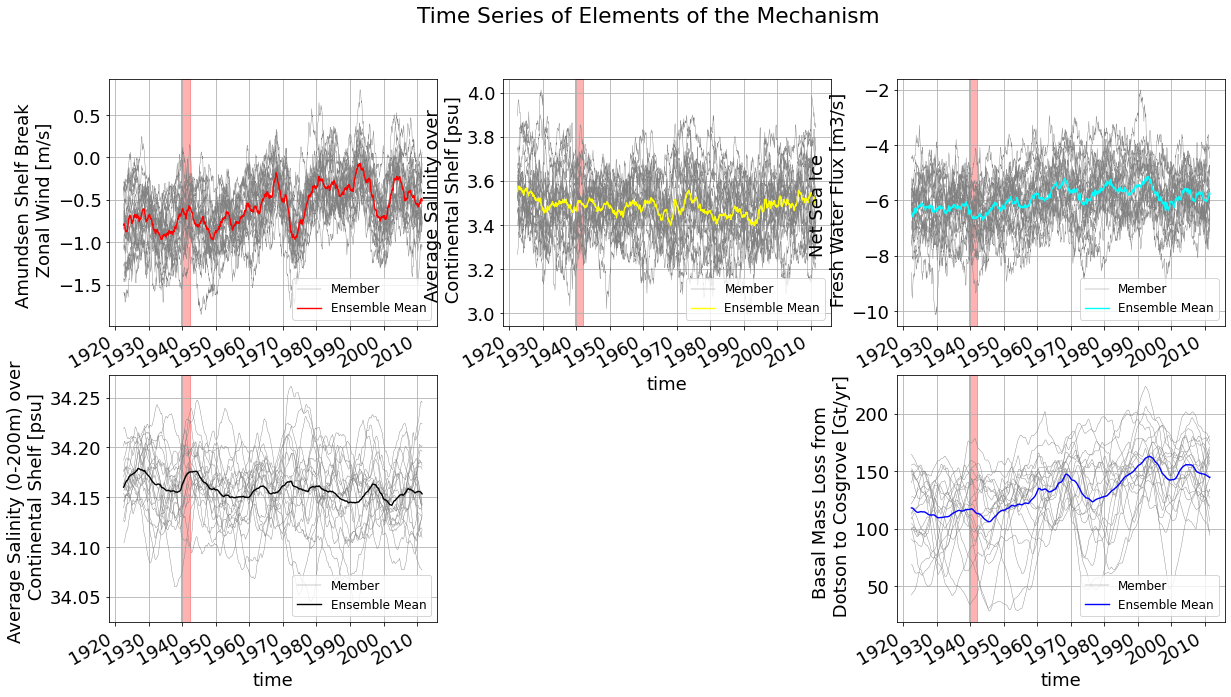

In [6]:
#Full plot!
fig=plt.figure(plt.figure(figsize=(20,10)))
fig.suptitle('Time Series of Elements of the Mechanism')
ax=plt.subplot(2,3,1)
plot_timeseries(data=full['amundsen_shelf_break_uwind_avg'], ax=ax, 
                window=60, handpicked=None, years=[1920,2013], show40s=True,
                colors=['grey','red','blue','red'], 
                label='Amundsen Shelf Break \n Zonal Wind [m/s]')

ax=plt.subplot(2,3,2)
plot_timeseries(data=vwind['inner_amundsen_shelf_vwind_avg'], ax=ax, 
                window=60, handpicked=None, years=[1920,2013], show40s=True,
                colors=['grey','yellow','blue','red'], 
                label='Average Salinity over \n Continental Shelf [psu]')


ax=plt.subplot(2,3,3)
plot_timeseries(data=forcing['amundsen_shelf_seaice_freeze']+forcing['amundsen_shelf_seaice_melt'], ax=ax, 
                window=60, handpicked=None, years=[1920,2013], show40s=True,
                colors=['grey','cyan','blue','red'], 
                label='Net Sea Ice \n Fresh Water Flux [m3/s]')



ax=plt.subplot(2,3,4)
plot_timeseries(data=salt['amundsen_shelf_salt_btw_0_200m'], ax=ax, 
                window=60, handpicked=None, years=[1920,2013], show40s=True,
                colors=['grey','black','blue','red'], 
                label='Average Salinity (0-200m) over \n Continental Shelf [psu]')

ax=plt.subplot(2,3,6)
plot_timeseries(data=full['dotson_to_cosgrove_massloss'], ax=ax, 
                window=60, handpicked=None, years=[1920,2013], show40s=True,
                colors=['grey','blue','blue','red'], 
                label='Basal Mass Loss from \n Dotson to Cosgrove [Gt/yr]')

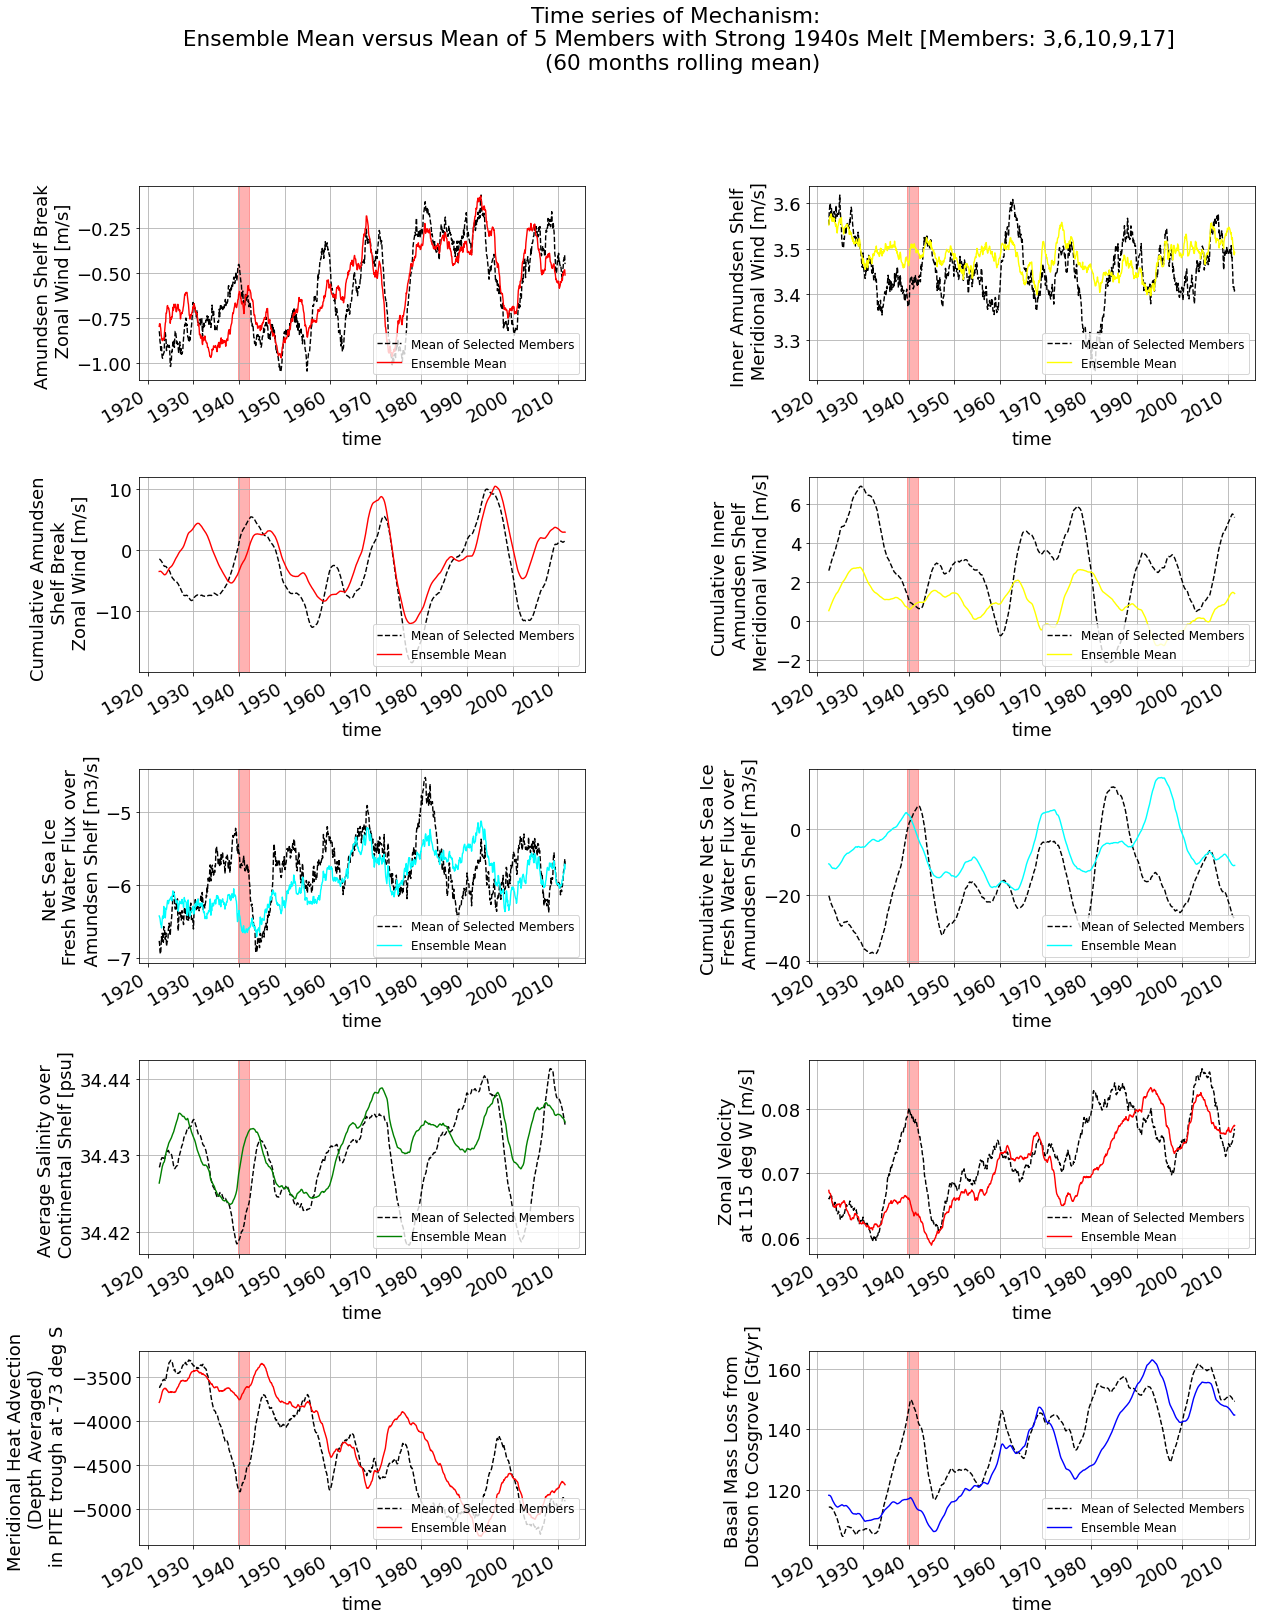

In [7]:
#What happens during strong 1940s?
window=60
handpicked=[2,5,9,8,16]

fig=plt.figure(plt.figure(figsize=(20,25)))
fig.suptitle('Time series of Mechanism: \n Ensemble Mean versus Mean of 5 Members with Strong 1940s Melt [Members: 3,6,10,9,17] \n ({} months rolling mean)'.format(str(window)))
ax=plt.subplot(5,2,1)
plot_timeseries(data=full['amundsen_shelf_break_uwind_avg'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','red','blue','black'], 
                label='Amundsen Shelf Break \n Zonal Wind [m/s]', show=[False, True, False, True])

ax=plt.subplot(5,2,2)
plot_timeseries(data=vwind['inner_amundsen_shelf_vwind_avg'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','yellow','blue','black'], 
                label='Inner Amundsen Shelf \n Meridional Wind [m/s]', show=[False, True, False, True])


ax=plt.subplot(5,2,3)
plot_timeseries(data=cumul_uwind, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','red','blue','black'], 
                label='Cumulative Amundsen \n  Shelf Break \n Zonal Wind [m/s]', show=[False, True, False, True])

ax=plt.subplot(5,2,4)
plot_timeseries(data=cumul_vwind, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','yellow','blue','black'], 
                label='Cumulative Inner \n Amundsen Shelf \n Meridional Wind [m/s]', show=[False, True, False, True])


# ax=plt.subplot(2,3,5)
# plot_timeseries(data=vwind['pine_island_bay_vwind_avg'], ax=ax, 
#                 window=window, handpicked=handpicked, years=[1920,1950], show40s=True,
#                 colors=['grey','yellow','blue','red'], 
#                 label='Average Meridional Wind over \n Inner Amundsen Shelf [psu]')


ax=plt.subplot(5,2,5)
plot_timeseries(data=forcing['amundsen_shelf_seaice_freeze']+forcing['amundsen_shelf_seaice_melt'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','cyan','blue','black'], 
                label='Net Sea Ice \n Fresh Water Flux over \n  Amundsen Shelf [m3/s]', show=[False, True, False, True])

ax=plt.subplot(5,2,6)
plot_timeseries(data=cumul_seaice, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','cyan','blue','black'], 
                label='Cumulative Net Sea Ice \n Fresh Water Flux over \n Amundsen Shelf [m3/s]', show=[False, True, False, True])

# ax=plt.subplot(2,3,4)
# plot_timeseries(data=salt['amundsen_shelf_salt_below_0m'], ax=ax, 
#                 window=60, handpicked=None, years=[1920,2013], show40s=True,
#                 colors=['grey','black','blue','red'], 
#                 label='Average Salinity over \n Continental Shelf [psu]')

# ax=plt.subplot(3,2,4)
# plot_timeseries(data=salt['amundsen_shelf_salt_btw_0_200m'], ax=ax, 
#                 window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
#                 colors=['grey','black','blue','black'], 
#                 label='Average Salinity (0-200m) over \n Continental Shelf [psu]', show=[False, True, False, True])


ax=plt.subplot(5,2,7)
plot_timeseries(data=salt2['amundsen_shelf_salt_below_0m'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','green','blue','black'], 
                label='Average Salinity over \n Continental Shelf [psu]', show=[False, True, False, True])


ax=plt.subplot(5,2,8)
plot_timeseries(data=U115, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','red','blue','black'], 
                label='Zonal Velocity \n at 115 deg W [m/s]', show=[False, True, False, True])
ax.set_title('')

ax=plt.subplot(5,2,9)
plot_timeseries(data=PITE, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','red','blue','black'], 
                label='Meridional Heat Advection \n (Depth Averaged) \n in PITE trough at -73 deg S', show=[False, True, False, True])
ax.set_title('')

ax=plt.subplot(5,2,10)
plot_timeseries(data=full['dotson_to_cosgrove_massloss'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','blue','blue','black'], 
                label='Basal Mass Loss from \n Dotson to Cosgrove [Gt/yr]', show=[False, True, False, True])

fig.subplots_adjust(hspace=0.5, wspace=0.5)

fig.savefig('../03_output/timeseries/Mechanism_1940s_{}months.png'.format(str(window)))

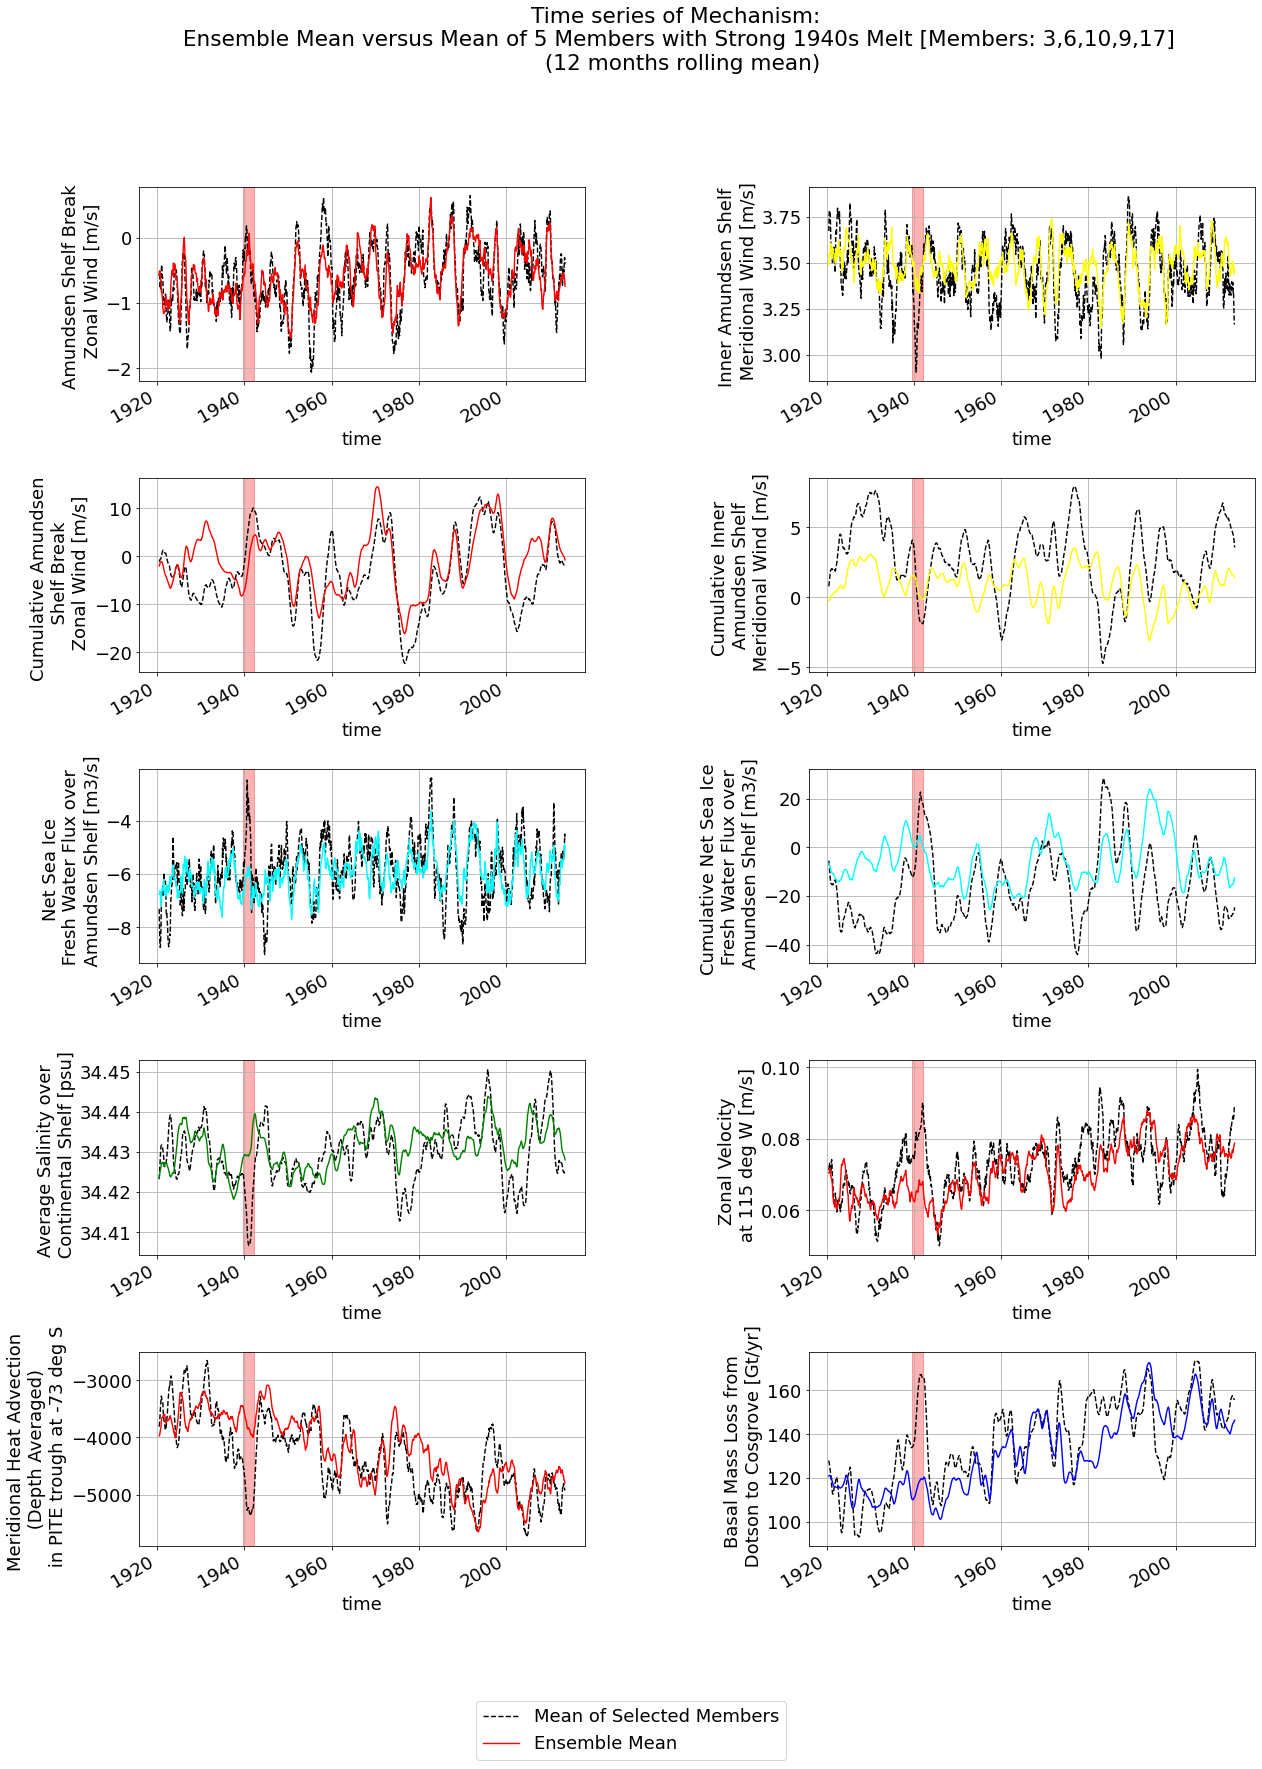

In [7]:
#What happens during strong 1940s?
window=12
handpicked=[2,5,9,8,16]

fig=plt.figure(plt.figure(figsize=(20,25)))
fig.suptitle('Time series of Mechanism: \n Ensemble Mean versus Mean of 5 Members with Strong 1940s Melt [Members: 3,6,10,9,17] \n ({} months rolling mean)'.format(str(window)))
ax=plt.subplot(5,2,1)
plot_timeseries(data=full['amundsen_shelf_break_uwind_avg'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','red','blue','black'], 
                label='Amundsen Shelf Break \n Zonal Wind [m/s]', show=[False, True, False, True])
ax.get_legend().remove()

ax=plt.subplot(5,2,2)
plot_timeseries(data=vwind['inner_amundsen_shelf_vwind_avg'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','yellow','blue','black'], 
                label='Inner Amundsen Shelf \n Meridional Wind [m/s]', show=[False, True, False, True])
ax.get_legend().remove()

ax=plt.subplot(5,2,3)
plot_timeseries(data=cumul_uwind, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','red','blue','black'], 
                label='Cumulative Amundsen \n  Shelf Break \n Zonal Wind [m/s]', show=[False, True, False, True])
ax.get_legend().remove()

ax=plt.subplot(5,2,4)
plot_timeseries(data=cumul_vwind, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','yellow','blue','black'], 
                label='Cumulative Inner \n Amundsen Shelf \n Meridional Wind [m/s]', show=[False, True, False, True])
ax.get_legend().remove()

# ax=plt.subplot(2,3,5)
# plot_timeseries(data=vwind['pine_island_bay_vwind_avg'], ax=ax, 
#                 window=window, handpicked=handpicked, years=[1920,1950], show40s=True,
#                 colors=['grey','yellow','blue','red'], 
#                 label='Average Meridional Wind over \n Inner Amundsen Shelf [psu]')


ax=plt.subplot(5,2,5)
plot_timeseries(data=forcing['amundsen_shelf_seaice_freeze']+forcing['amundsen_shelf_seaice_melt'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','cyan','blue','black'], 
                label='Net Sea Ice \n Fresh Water Flux over \n  Amundsen Shelf [m3/s]', show=[False, True, False, True])
ax.get_legend().remove()
ax=plt.subplot(5,2,6)
plot_timeseries(data=cumul_seaice, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','cyan','blue','black'], 
                label='Cumulative Net Sea Ice \n Fresh Water Flux over \n Amundsen Shelf [m3/s]', show=[False, True, False, True])
ax.get_legend().remove()
# ax=plt.subplot(2,3,4)
# plot_timeseries(data=salt['amundsen_shelf_salt_below_0m'], ax=ax, 
#                 window=60, handpicked=None, years=[1920,2013], show40s=True,
#                 colors=['grey','black','blue','red'], 
#                 label='Average Salinity over \n Continental Shelf [psu]')

# ax=plt.subplot(3,2,4)
# plot_timeseries(data=salt['amundsen_shelf_salt_btw_0_200m'], ax=ax, 
#                 window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
#                 colors=['grey','black','blue','black'], 
#                 label='Average Salinity (0-200m) over \n Continental Shelf [psu]', show=[False, True, False, True])


ax=plt.subplot(5,2,7)
plot_timeseries(data=salt2['amundsen_shelf_salt_below_0m'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','green','blue','black'], 
                label='Average Salinity over \n Continental Shelf [psu]', show=[False, True, False, True])
ax.get_legend().remove()

ax=plt.subplot(5,2,8)
plot_timeseries(data=U115, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','red','blue','black'], 
                label='Zonal Velocity \n at 115 deg W [m/s]', show=[False, True, False, True])
ax.set_title('')
ax.get_legend().remove()

ax=plt.subplot(5,2,9)
plot_timeseries(data=PITE, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','red','blue','black'], 
                label='Meridional Heat Advection \n (Depth Averaged) \n in PITE trough at -73 deg S', show=[False, True, False, True])
ax.set_title('')
ax.get_legend().remove()

ax=plt.subplot(5,2,10)
plot_timeseries(data=full['dotson_to_cosgrove_massloss'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
                colors=['grey','blue','blue','black'], 
                label='Basal Mass Loss from \n Dotson to Cosgrove [Gt/yr]', show=[False, True, False, True])
ax.get_legend().remove()

fig.subplots_adjust(hspace=0.5, wspace=0.5)

fig.legend(['Mean of Selected Members', 'Ensemble Mean'], loc='lower center')
fig.savefig('../03_output/timeseries/Mechanism_1940s_{}months.png'.format(str(window)))

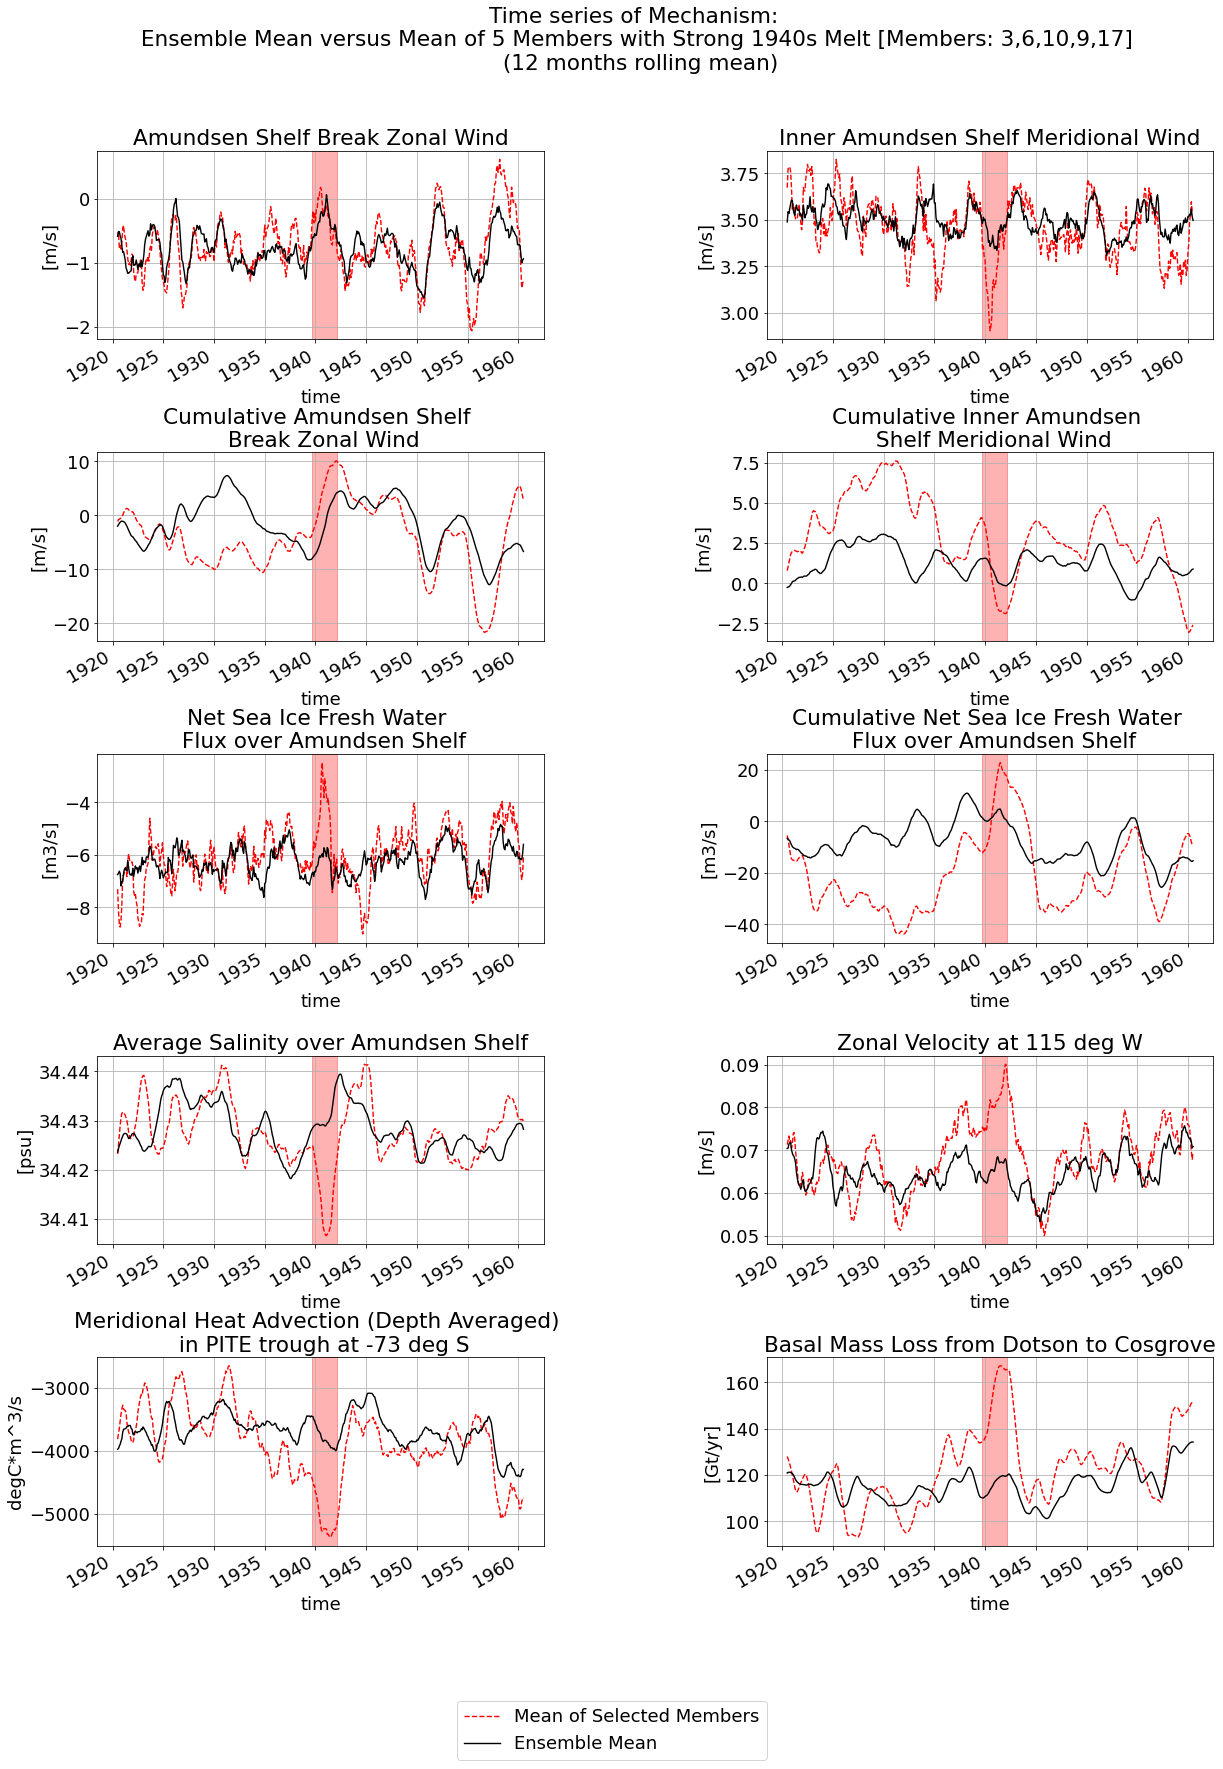

In [13]:
#What happens during strong 1940s?
window=12
handpicked=[2,5,9,8,16]

fig=plt.figure(plt.figure(figsize=(20,25)))
fig.suptitle('Time series of Mechanism: \n Ensemble Mean versus Mean of 5 Members with Strong 1940s Melt [Members: 3,6,10,9,17] \n ({} months rolling mean)'.format(str(window)))
ax=plt.subplot(5,2,1)
plot_timeseries(data=full['amundsen_shelf_break_uwind_avg'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,1960], show40s=True,
                colors=['grey','black','blue','red'], 
                label='[m/s]', show=[False, True, False, True])
ax.get_legend().remove()
ax.set_title('Amundsen Shelf Break Zonal Wind')

ax=plt.subplot(5,2,2)
plot_timeseries(data=vwind['inner_amundsen_shelf_vwind_avg'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,1960], show40s=True,
                colors=['grey','black','blue','red'], 
                label='[m/s]', show=[False, True, False, True])
ax.get_legend().remove()
ax.set_title('Inner Amundsen Shelf Meridional Wind')

ax=plt.subplot(5,2,3)
plot_timeseries(data=cumul_uwind, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,1960], show40s=True,
                colors=['grey','black','blue','red'], 
                label='[m/s]', show=[False, True, False, True])
ax.get_legend().remove()
ax.set_title('Cumulative Amundsen Shelf \n Break Zonal Wind')

ax=plt.subplot(5,2,4)
plot_timeseries(data=cumul_vwind, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,1960], show40s=True,
                colors=['grey','black','blue','red'], 
                label='[m/s]', show=[False, True, False, True])
ax.get_legend().remove()
ax.set_title('Cumulative Inner Amundsen \n Shelf Meridional Wind')

# ax=plt.subplot(2,3,5)
# plot_timeseries(data=vwind['pine_island_bay_vwind_avg'], ax=ax, 
#                 window=window, handpicked=handpicked, years=[1920,1950], show40s=True,
#                 colors=['grey','yellow','blue','red'], 
#                 label='Average Meridional Wind over \n Inner Amundsen Shelf [psu]')


ax=plt.subplot(5,2,5)
plot_timeseries(data=forcing['amundsen_shelf_seaice_freeze']+forcing['amundsen_shelf_seaice_melt'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,1960], show40s=True,
                colors=['grey','black','blue','red'], 
                label='[m3/s]', show=[False, True, False, True])
ax.get_legend().remove()
ax.set_title('Net Sea Ice Fresh Water \n Flux over Amundsen Shelf')

ax=plt.subplot(5,2,6)
plot_timeseries(data=cumul_seaice, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,1960], show40s=True,
                colors=['grey','black','blue','red'], 
                label='[m3/s]', show=[False, True, False, True])
ax.get_legend().remove()
ax.set_title('Cumulative Net Sea Ice Fresh Water \n Flux over Amundsen Shelf')

# ax=plt.subplot(2,3,4)
# plot_timeseries(data=salt['amundsen_shelf_salt_below_0m'], ax=ax, 
#                 window=60, handpicked=None, years=[1920,2013], show40s=True,
#                 colors=['grey','black','blue','red'], 
#                 label='Average Salinity over \n Continental Shelf [psu]')

# ax=plt.subplot(3,2,4)
# plot_timeseries(data=salt['amundsen_shelf_salt_btw_0_200m'], ax=ax, 
#                 window=window, handpicked=handpicked, years=[1920,2013], show40s=True,
#                 colors=['grey','black','blue','black'], 
#                 label='Average Salinity (0-200m) over \n Continental Shelf [psu]', show=[False, True, False, True])


ax=plt.subplot(5,2,7)
plot_timeseries(data=salt2['amundsen_shelf_salt_below_0m'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,1960], show40s=True,
                colors=['grey','black','blue','red'], 
                label='[psu]', show=[False, True, False, True])
ax.get_legend().remove()
ax.set_title('Average Salinity over Amundsen Shelf')

ax=plt.subplot(5,2,8)
plot_timeseries(data=U115, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,1960], show40s=True,
                colors=['grey','black','blue','red'], 
                label='[m/s]', show=[False, True, False, True])
ax.set_title('Zonal Velocity at 115 deg W')
ax.get_legend().remove()

ax=plt.subplot(5,2,9)
plot_timeseries(data=PITE, ax=ax, 
                window=window, handpicked=handpicked, years=[1920,1960], show40s=True,
                colors=['grey','black','blue','red'], 
                label='degC*m^3/s', show=[False, True, False, True])
ax.set_title('Meridional Heat Advection (Depth Averaged) \n in PITE trough at -73 deg S')
ax.get_legend().remove()

ax=plt.subplot(5,2,10)
plot_timeseries(data=full['dotson_to_cosgrove_massloss'], ax=ax, 
                window=window, handpicked=handpicked, years=[1920,1960], show40s=True,
                colors=['grey','black','blue','red'], 
                label='[Gt/yr]', show=[False, True, False, True])
ax.get_legend().remove()
ax.set_title('Basal Mass Loss from Dotson to Cosgrove')

fig.subplots_adjust(hspace=0.6, wspace=0.5, top=0.9)
fig.legend(['Mean of Selected Members', 'Ensemble Mean'], loc='lower center')

fig.savefig('../03_output/timeseries/Mechanism_1940s_{}months_zoomed.png'.format(str(window)))